# Unit 5 - Financial Planning


**Initial imports**

Let's import the following libraries for this assignment. We will use `alpaca trade api` to pull historical stocks and bonds information. `MCSimulation` is used to estimate the possible outcomes of an uncertain events.

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

Change the style how pandas dataframes will be displayed

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

**Load .env enviroment variables**

The environment variables include the API and secret keys required for calling the Alpaca trade api.

In [3]:
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

**Set current amount of crypto assets**

First we create the variables `my_btc` and `my_eth` and store the assumed amount of crypto assets.

In [4]:
my_btc = 1.2
my_eth = 5.3

**Crypto API URLs**

We will be using the following API urls for fetching the current price of bitcoin and ethereum

In [5]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?format=json"

**Execute get request**


We will use `request` library to fetch the current price in US dollars of bitcoin('BTC') and ethereum('ETH') using [Alternative free crypto api](https://alternative.me/crypto/api/).

In [6]:
btc_json = requests.get(btc_url).json()
btc_json

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18664612,
   'total_supply': 18664612,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 52732.0,
     'volume_24h': 61051284353,
     'market_cap': 979202768444,
     'percentage_change_1h': 0.378212735689377,
     'percentage_change_24h': 0.770037248717252,
     'percentage_change_7d': -8.96069362790647,
     'percent_change_1h': 0.378212735689377,
     'percent_change_24h': 0.770037248717252,
     'percent_change_7d': -8.96069362790647}},
   'last_updated': 1616734446}},
 'metadata': {'timestamp': 1616734446,
  'num_cryptocurrencies': 1329,
  'error': None}}

In [7]:
eth_json = requests.get(eth_url).json()
eth_json

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115204034,
   'total_supply': 115204034,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1624.58,
     'volume_24h': 26378405710,
     'market_cap': 186677734027,
     'percentage_change_1h': 0.137185981162874,
     'percentage_change_24h': 3.01795762386063,
     'percentage_change_7d': -8.73964655626564,
     'percent_change_1h': 0.137185981162874,
     'percent_change_24h': 3.01795762386063,
     'percent_change_7d': -8.73964655626564}},
   'last_updated': 1616734447}},
 'metadata': {'timestamp': 1616734447,
  'num_cryptocurrencies': 1329,
  'error': None}}

**Extract current BTC and ETH price**

From the above JSON responses, we extract the current prices of BTC and ETH using their responding ids. The BTC has `id` 1 and ETH has `id` 1027

In [8]:
btc_price = btc_json['data']['1']['quotes']['USD']['price']
btc_price

52732.0

In [9]:
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
eth_price

1624.58

**Compute current value of my crypto assets**

Calculate the total current values of the crypto assets by multiplying the amount of assets with their current market price.

In [10]:
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63278.40
The current value of your 5.3 ETH is $8610.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

**Set current amount of shares**

Let's create two variables `my_agg` and `my_spy` and set the following current amount of shares:

In [11]:
my_agg = 200
my_spy = 50

**Set Alpaca API key and secret**

Set the `alpaca_api_key` and `alpaca_secret_key` from the environment variables using   `os.getenv` function.

In [12]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

Verify that Alpaca key and secret were correctly loaded

In [13]:
print(f"Key type: {type(alpaca_api_key)}")
print(f"Secret type: {type(alpaca_secret_key)}")

Key type: <class 'str'>
Secret type: <class 'str'>


**Create the Alpaca API object**

Create `api` object by using `tradeapi.REST` function from the alpaca SDK.

In [14]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

**Format current date as ISO format**

In [15]:
current_date = pd.Timestamp("2021-03-25", tz="America/New_York").isoformat()

**Create a list of tickers with two elements which are the symbols `AGG` and `SPY`**

In [16]:
tickers = ["AGG", "SPY"]

**Set timeframe to '1D' for Alpaca API**

In [17]:
timeframe = "1D"

**Get the current closing prices for `AGG` and `SPY`**

We will call the alpaca `get_batset` api to retrieve the current closing prices of the ticker symbols. 

Then, we convert the response to a pandas dataframe and assign it to a variable `df_tickers`.

In [18]:
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date 
).df

**Preview the dataframe**

In [19]:
df_tickers

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-03-25 00:00:00-04:00  114.24  114.29  113.99  114.095  5051494  385.98   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-25 00:00:00-04:00  390.55  383.9  389.64  99874063

**Pick AGG and SPY close prices**

Create two variables `agg_close_price` and `spy_close_price` to store the closing prices. 

In [20]:
agg_close_price = float(df_tickers['AGG']['close'])
spy_close_price = float(df_tickers['SPY']['close'])

**Print AGG and SPY close prices**

In [21]:
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.095
Current SPY closing price: $389.64


**Compute the current value of shares**

Create variables `my_agg_value` and `my_spy_value` to store the current value of shares.

To get the current value of AGG, we need to multiply the closing price `agg_close_price` and current amount of AGG `my_agg`.
To get the current value of SPY, we need to multiply the closing price `spy_close_price` and current amount of SPY `my_spy`.

In [22]:
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

**Print current value of shares**

In [23]:
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}.")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}.")

The current value of your 200 AGG shares is $22819.00.
The current value of your 50 SPY shares is $19482.00.


### Savings Health Analysis

In this section, we will assess the financial health of the credit union's members.

**Set monthly household income**

Create a variable `monthly_income` and set its value to `12000`.

In [24]:
monthly_income = 12000

**Create savings DataFrame**

Before we create the dataframe, let's first calculate the total value of crypto assets and shares and store in `crypto_value` and `shares_value`.

In [25]:
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

**Create dataframe**

To analyze savings health, we then create a savings dataframe `df_savings` with two rows (`crypto` , `shares`) and one column (`amount`).

In [26]:
df_savings = pd.DataFrame(
    [crypto_value, shares_value], 
    columns=["amount"], 
    index=["crypto", "shares"]
)

**Display the savings dataframe**

In [27]:
display(df_savings)

,amount
crypto,71888.674
shares,42301.000


**Plot savings pie chart**

We will use a pie chart to visualize the composition of personal savings.

From the pie chart, we can observe that the crypto assets have a higher contribution towards the personal savings.

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

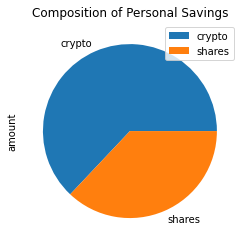

In [28]:
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

**Set ideal emergency fund**

According to experts, the ideal emergency fund should have enough money to cover at least 3 to 6 months' worth of living expenses. 

So let's create a variable `emergency_fund` to store the ideal emergency fund.

In [29]:
emergency_fund = monthly_income * 3

**Calculate total amount of savings**

To calculate the total amount of savings we just add `crypto_value` and ` shares_value`.

Store the resulting sum in a variable `total_savings`.

In [30]:
total_savings = crypto_value + shares_value

**Validate saving health**

Finally, we validate the savings health of the members by using the following conditional logic.
    
* If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

* If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

* If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.


In [31]:
if total_savings > emergency_fund:
    print("Congratulation! You have enough money in your fund.")
elif total_savings == emergency_fund:
    print("Congratulation! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal.")      

Congratulation! You have enough money in your fund.


## Part 2 - Retirement Planning

In this section, we will use the Alpaca API to fetch historical closing prices for a retirement portfolio. 

By the use of MCForecastTools toolkit, we will create a Monte Carlo simulations to project the portfolio performance at `30` years.

### Monte Carlo Simulation

A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present. Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.

Set start and end dates of five years back from today

In [32]:
start_date = pd.Timestamp('2016-03-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-25', tz='America/New_York').isoformat()

**Set the tickers**

In [33]:
tickers = ["AGG", "SPY"]

**Set timeframe to '1D' for Alpaca API**

In [34]:
timeframe = "1D"

**Get 5 years' worth of historical data for AGG and SPY**
 
Call the Alpaca `get_barset` api to fetch the  five years of historical data for `tickers`.

Convert the response to a pandas dataframe `df_stock_data`.

In [35]:
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

**Display some sample data**

In [36]:
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935.0   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282.0   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535.0   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826.0   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-04-04 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-04-05 00:00:00-04:00  236.26  237.390  234.540  234.77  84819899.0  
2017-04-06 00:00:00-04:00  234.95  236.040  234.425  235.39  53559902.0  
2017-04-07 00:00:00-04:00  235.15  236.000  234.640  235.17  53293901.0  
2017-04-10 00:00:00-04:00  235.36  236.255  234.730  235.32  46610548.0

**Configuring a Monte Carlo simulation to forecast 30 years cumulative returns**

Create a variable `MC_thirtyyears` to store the configuration of monte carlo simulation to forecast thirty years cumulative returns.

Here, we are considering a traditional `40/60` portfolio. The composition of the portfolio is `60%` stocks of `SPY` and `40%` bonds of `AGG`.

In [37]:
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

**Print the simulation input data**

In [38]:
MC_thirtyyears.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-04-04 00:00:00-04:00  108.61  108.65  108.5200  108.56  1482935.0   
2017-04-05 00:00:00-04:00  108.48  108.74  108.4530  108.69  1900282.0   
2017-04-06 00:00:00-04:00  108.64  108.71  108.4800  108.67  1599535.0   
2017-04-07 00:00:00-04:00  108.80  108.89  108.4200  108.44  1668826.0   
2017-04-10 00:00:00-04:00  108.53  108.65  108.4901  108.57  1751500.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-04-04 00:00:00-04:00          NaN     NaN      NaN      NaN     NaN   
2017-04-05 00:00:00-04:00     0.001197  236.26  237.390  234.540  234.77   
2017-04-06 00:00:00-04:00    -0.000184  234.95  236.040  234.425  235.39   
2017-04-07 00:00:00-04:00    -0.002116  235.15  236.000  234.640  235.17   
2017-04-10 00:00:00-04:00     0.001199  235.36  236.255  234.730  235.32   

                                                    
                               volume daily_return  
time                                                
2017-04-04 00:00:00-04:00         NaN          NaN  
2017-04-05 00:00:00-04:00  84819899.0          NaN  
2017-04-06 00:00:00-04:00  53559902.0     0.002641  
2017-04-07 00:00:00-04:00  53293901.0    -0.000935  
2017-04-10 00:00:00-04:00  46610548.0     0.000638

**Monte Carlo Simulation**

We will run a Monte Carlo simulation to forecast 30 years cumulative returns. To do this, we call the method `calc_cumulative_return`.

In [39]:
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994456,1.004330,1.004205,1.009061,1.008526,0.998422,1.005593,1.018217,0.997625,0.998696,...,0.999371,1.011380,1.007120,1.001923,1.003880,0.997479,0.981912,0.988627,0.993453,1.011505
2,0.982186,1.005680,1.005784,1.020007,1.007499,0.981003,1.005914,1.024259,0.995961,0.993948,...,1.005942,1.014040,0.994368,0.997219,1.008602,1.006551,0.971692,1.001645,0.987541,1.015013
3,0.982575,1.004189,1.000361,1.027084,1.004203,0.966806,1.000063,1.018140,0.989350,1.002105,...,0.991681,1.014479,0.996605,0.989002,1.020686,1.001922,0.974496,1.011569,0.983000,1.014235
4,0.981999,0.998627,1.012782,1.025835,1.017471,0.967855,1.001129,1.012723,0.997226,0.990759,...,0.995329,1.003931,0.986795,0.983789,1.009285,1.001245,0.973500,1.003911,0.990027,1.017005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.360286,37.009079,9.975836,13.913155,9.505529,1.836073,11.265861,7.865910,43.452970,8.991866,...,4.993462,25.334102,10.498345,12.696177,8.613783,13.308886,11.427834,14.242219,9.894200,17.517424
7557,9.350607,37.363373,9.961589,14.088626,9.420657,1.836114,11.323784,7.909499,43.655624,9.076120,...,5.011763,25.256758,10.525767,12.681720,8.568261,13.493538,11.489367,14.206023,9.962655,17.572836
7558,9.418695,37.741864,9.969778,14.173731,9.531597,1.868808,11.192694,7.815613,43.547281,9.061591,...,5.000296,25.394220,10.454481,12.538445,8.526347,13.539214,11.464478,14.333924,9.930914,17.561630
7559,9.371088,37.408896,9.978852,14.184937,9.553638,1.877994,11.147836,7.849555,43.837384,9.083667,...,5.001963,25.084076,10.284162,12.701040,8.574841,13.643194,11.577522,14.264581,10.048649,17.321625


**Plot simulation outcomes**

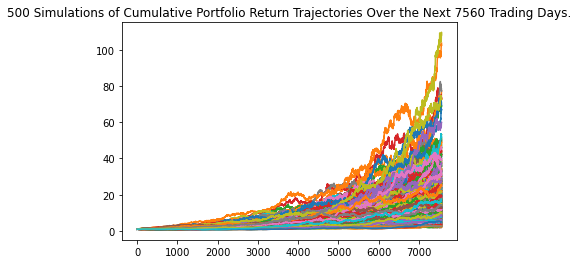

In [40]:
line_plot_thirty = MC_thirtyyears.plot_simulation()

Plot probability distribution and confidence intervals

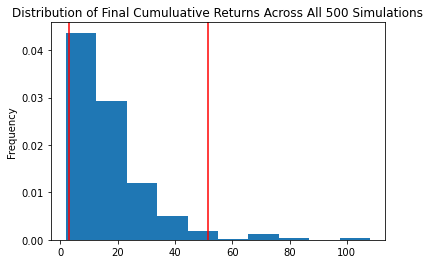

In [41]:
dist_plot_thirty = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In this section, we will perform some analysis on the Monte Carlo simulation results.

**1. Fetch summary statistics from the Monte Carlo simulation results**

Create a variable `summary_stats_thirty` to store thirty years of summary statistics from the monte carlo simulation results.

In [42]:
summary_stats_thirty = MC_thirtyyears.summarize_cumulative_return()

**Print summary statistics**

In [43]:
print(summary_stats_thirty)

count           500.000000
mean             17.216751
std              13.947583
min               1.891521
25%               8.125975
50%              13.283959
75%              21.218258
max             108.123455
95% CI Lower      3.076552
95% CI Upper     51.476810
Name: 7560, dtype: float64


**2. Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.**

Create a variable `initial_investment` and assign a value of `$20,000`.

In [44]:
initial_investment = 20000

**Confidence Intervals**

Create variables `ci_lower` and `ci_upper` to store the calculated value of the range of possible outcomes of $20,000 by using the value of the lower and upper `95%` confidence intervals.

In [45]:
ci_lower = round(summary_stats_thirty[8] * 20000, 2)
ci_upper = round(summary_stats_thirty[9] * 20000, 2)

**Print Results**

In [46]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61531.05 and $1029536.2


**3. Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.**

Here, we are calculating the expected portfolio return based on `50%` increase in the `initial_investment`.

In [47]:
initial_investment = 20000 * 1.5

**Confidence Intervals**

Let's use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of $30,000.

In [48]:
ci_lower = round(summary_stats_thirty[8] * 30000, 2)
ci_upper = round(summary_stats_thirty[9] * 30000, 2)

**Print Results**

In [49]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $92296.57 and $1544304.3


## Optional Challenge - Early Retirement

In this section, we are analyzing the  early retirement option for five years and ten years by considering higher initial investment.

### Five Years Retirement Option

**Configure a Monte Carlo simulation to forecast 5 years cumulative returns**

Create a variable `MC_fiveyears` to store the configuration of monte carlo simulation to forecast five years cumulative returns.

Here, we are considering traditional `40/60` portfolio. The composition of the portfolio is `60%` stocks of `SPY` and `40%` bonds of `AGG`.

In [50]:
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

**Monte Carlo Simulation**

Let's run a Monte Carlo simulation to forecast 5 years cumulative returns

In [51]:
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006744,0.994657,0.995370,1.004856,1.005935,1.009694,1.002154,1.003709,0.984540,1.001632,...,1.007640,1.015105,1.010381,0.994587,0.991930,1.012501,0.996121,1.017261,0.993401,0.997906
2,1.022724,1.000085,0.988470,1.003759,0.998409,1.019257,0.994881,1.009395,0.993897,1.011149,...,1.023451,0.997046,1.009376,0.998956,0.993451,1.013724,0.983909,1.014502,0.983730,1.012742
3,1.031131,1.006486,0.989506,0.990751,0.987076,1.016844,0.992800,1.019255,1.000368,1.014262,...,1.009684,0.986619,1.010895,1.000609,0.989268,1.001248,0.978053,1.021619,0.985842,1.018735
4,1.015923,1.011685,0.977104,1.002560,0.967943,1.015435,0.999743,1.030861,1.001318,1.010616,...,1.000306,0.968773,1.017434,1.004978,0.990121,1.007763,0.966440,1.012977,0.981485,1.019889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.928993,2.188964,1.271520,1.680284,1.029421,3.072270,1.384405,2.037586,1.157988,0.892384,...,1.285616,1.824821,1.694838,0.901381,1.502183,1.318112,1.357104,2.168610,1.352430,1.178911
1257,1.955727,2.205863,1.269387,1.659190,1.024490,3.037454,1.387608,2.035864,1.166012,0.894693,...,1.295519,1.828699,1.678817,0.904317,1.494061,1.326340,1.341503,2.141702,1.346408,1.191406
1258,1.978219,2.199946,1.268135,1.663849,1.047303,3.010831,1.387848,2.037809,1.155338,0.876401,...,1.301485,1.817976,1.686003,0.903018,1.495613,1.324769,1.345562,2.145227,1.347936,1.184269
1259,1.969424,2.190570,1.268893,1.642469,1.038511,3.018464,1.396987,2.042154,1.142042,0.880804,...,1.312771,1.833913,1.672199,0.897079,1.460414,1.330515,1.350539,2.113671,1.331079,1.173222


**Plot the simulation outcomes**

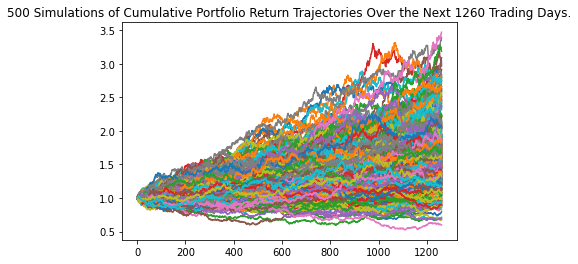

In [52]:
line_plot_five = MC_fiveyears.plot_simulation()

**Plot probability distribution and confidence intervals**

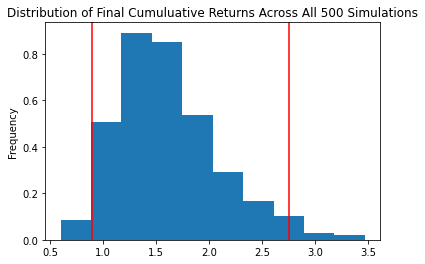

In [53]:
dist_plot_five = MC_fiveyears.plot_distribution()

**Fetch summary statistics from the Monte Carlo simulation results**

Create a variable `summary_stats_five` to store thirty years of summary statistics from the monte carlo simulation results.

In [54]:
summary_stats_five = MC_fiveyears.summarize_cumulative_return()

**Print summary statistics**

In [55]:
print(summary_stats_five)

count           500.000000
mean              1.604659
std               0.478616
min               0.597245
25%               1.258553
50%               1.533604
75%               1.862120
max               3.469935
95% CI Lower      0.889842
95% CI Upper      2.755385
Name: 1260, dtype: float64


**Set initial investment**

Here, we are calculating the expected portfolio return based on `300%` increase in the `initial_investment`.

In [56]:
initial_investment = 20000 * 3

**Confidence Intervals**

Create variables `ci_lower_five` and `ci_upper_five` to store the calculated value of the range of possible outcomes of $60,000 by using the value of the lower and upper `95%` confidence intervals.

In [57]:
ci_lower_five = round(summary_stats_five[8] * 60000, 2)
ci_upper_five = round(summary_stats_five[9] * 60000, 2)

**Print results**

In [58]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53390.54 and $165323.12


### Ten Years Retirement Option

In this section, we are analyzing the  early retirement option for ten years by including higher initial investment.

**Configure a Monte Carlo simulation to forecast 10 years cumulative returns**

Create a variable `MC_tenyears` to store the configuration of monte carlo simulation to forecast ten years cumulative returns.

Here, we are considering traditional `40/60` portfolio. The composition of the portfolio is `60%` stocks of `SPY` and `40%` bonds of `AGG`.

In [59]:
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

**Monte Carlo Simulation**

Let's run a Monte Carlo simulation to forecast 10 years cumulative returns

In [60]:
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981159,1.003159,0.993718,1.001538,0.993205,1.009997,1.005947,0.995403,1.001196,0.993747,...,1.007762,0.985943,0.992539,1.002501,1.000381,0.991949,0.997554,0.989339,1.003585,0.999698
2,0.963741,1.003634,1.005982,0.999686,0.981047,1.007585,0.990022,0.996359,1.014398,0.982307,...,1.011615,0.983954,0.983911,1.006119,0.984418,0.995376,0.990691,0.987164,0.989739,1.001184
3,0.972105,0.995511,1.009274,1.006456,0.992520,1.014652,0.985831,1.003466,1.021984,0.988451,...,1.012677,0.982005,0.992628,1.000208,0.974488,0.981100,0.977492,0.988454,0.983825,1.015034
4,0.966632,0.997377,1.016216,1.021197,0.988900,1.022175,0.997059,0.997092,1.023289,0.993789,...,1.019832,0.988332,1.001113,1.007701,0.962478,0.985197,0.992446,0.985050,0.987508,1.006892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.897685,2.938939,2.237538,3.440144,2.587388,1.467695,1.525618,2.556439,5.588105,2.167229,...,2.947213,2.434737,3.633162,1.358142,2.088612,2.400836,1.893768,2.289314,4.185767,1.816162
2517,1.894660,2.916966,2.256098,3.478490,2.593705,1.468994,1.523191,2.555388,5.554201,2.160662,...,2.944946,2.453814,3.668753,1.356526,2.083311,2.388819,1.928504,2.283558,4.198194,1.803861
2518,1.919683,2.895214,2.288750,3.486313,2.600165,1.470154,1.520980,2.562834,5.504112,2.173308,...,2.943314,2.487116,3.705850,1.349570,2.114364,2.385478,1.914387,2.281204,4.221763,1.815043
2519,1.897536,2.894782,2.264076,3.502883,2.614398,1.481304,1.520754,2.522490,5.487492,2.171105,...,2.945548,2.501402,3.708954,1.341425,2.118925,2.390444,1.905842,2.277907,4.240528,1.823876


**Plot the simulation outcomes**

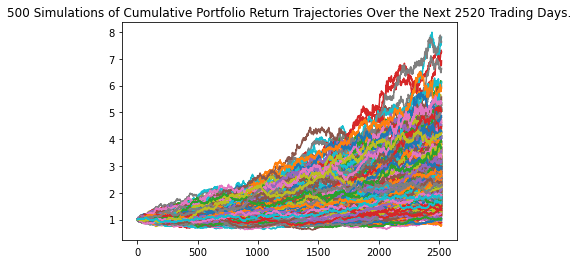

In [61]:
line_plot_ten = MC_tenyears.plot_simulation()

**Plot the probability distribution and confidence intervals**

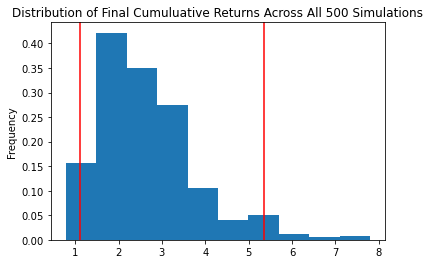

In [62]:
dist_plot_ten = MC_tenyears.plot_distribution()

**Fetch summary statistics from the Monte Carlo simulation results**

Create a variable `summary_stats_ten` to store ten years of summary statistics from the monte carlo simulation resullts.

In [63]:
summary_stats_ten = MC_tenyears.summarize_cumulative_return()

**Print summary statistics**

In [64]:
print(summary_stats_ten)

count           500.000000
mean              2.634877
std               1.127612
min               0.784690
25%               1.836286
50%               2.409789
75%               3.144477
max               7.801491
95% CI Lower      1.102747
95% CI Upper      5.358290
Name: 2520, dtype: float64


**Set initial investment**

Here, we are calculating the expected portfolio return based on `300%` increase in the `initial_investment`.

In [65]:
initial_investment = 20000 * 3

**Confidence Intervals**

Create variables `ci_lower_ten` and `ci_upper_ten` to store the calculated value of the range of possible outcomes of $60,000 by using the value of the lower and upper `95%` confidence intervals.

In [66]:
ci_lower_ten = round(summary_stats_ten[8] * 60000, 2)
ci_upper_ten = round(summary_stats_ten[9] * 60000, 2)

**Print Results**

In [67]:
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66164.81 and $321497.38
